# Data Science and Visualization (RUC F2023)

## Lecture 4: Classification (I)

 # Decision Tree and Random Forest (Additional example)
 
 This example uses the Iris data set and demonstrates a classification problem with three class labels.

## 0. Importing the Required Libraries

In [3]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## 1. Loading the Data

In [4]:
data = pd.read_csv('C:\Data\iris.csv')

In [4]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
data.shape

(150, 5)

## 2. Feature Selection

Let's first take a look at all columns' information:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

Apparently, the Outcome column contains the class label. So it should be excluded from the features. Let's also assume Age is not that relevant, so we also drop it from the feature columns.

In [8]:
feature_cols = data.columns.drop(['variety'])
feature_cols

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width'], dtype='object')

Class labels:

In [5]:
data.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

Conventionaly, we use **X** to represent all data under the feature columns, and *y* the class label column in the data.

In [10]:
# Features
X = data[feature_cols]

# Target variable
y = data.variety 

## 3. Splitting the Data into Training and Test Dets

This is done by calling function train_test_split(.):

Input:
* test_size: The percentage of data used for testing.

Output:
* X_train: Features of the training data
* X_test: Features of the test data
* y_train: Class labels of the training data 
* y_test: Class labels (**groundtruth**) of the test data

In [11]:
# In this case: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Note that X_train and y_train correspond to each other in the original data:

In [12]:
X_train.head()

,sepal.length,sepal.width,petal.length,petal.width
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4


In [13]:
y_train.head()

118     Virginica
18         Setosa
4          Setosa
45         Setosa
59     Versicolor
Name: variety, dtype: object

And so do X_test and y_test:

In [14]:
X_test.head()

,sepal.length,sepal.width,petal.length,petal.width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [15]:
y_test.head()

14         Setosa
98     Versicolor
75     Versicolor
16         Setosa
131     Virginica
Name: variety, dtype: object

## 4. Building a Decision Tree Model

Let's create a Decision Tree Model using Scikit-learn. We give no arguments, which means a default tree is built.

In [16]:
dtree = DecisionTreeClassifier()

But now the decision tree model (classifier) is empty, it has seen no training data and cannot do anything good for us.

We need to train this decision tree, by **'fitting'** the empty model to the available training data. This is done by calling the **fit(.)** function:

In [17]:
dtree = dtree.fit(X_train, y_train)

Now we can apply the decision tree classifier to the test data, by calling the **predict(.)** function:

In [18]:
#Predict the response for test dataset
y_pred = dtree.predict(X_test)

Let's take a look at the predicted result:

In [19]:
y_pred

array(['Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica',
       'Versicolor', 'Virginica', 'Setosa', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa',
       'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Setosa', 'Versicolor', 'Virginica',
       'Versicolor', 'Virginica', 'Versicolor', 'Virginica', 'Virginica',
       'Setosa', 'Versicolor', 'Setosa', 'Versicolor', 'Virginica',
       'Virginica', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor'],
      dtype=object)

How does the predicted result align with the groundtruth in y_test?

In [20]:
y_test.values

array(['Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica',
       'Versicolor', 'Virginica', 'Setosa', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa',
       'Versicolor', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Setosa', 'Versicolor', 'Virginica',
       'Versicolor', 'Virginica', 'Versicolor', 'Virginica', 'Virginica',
       'Setosa', 'Versicolor', 'Setosa', 'Versicolor', 'Virginica',
       'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Versicolor'],
      dtype=object)

## 5. Evaluating the Model

Let's measure how accurately the classifier or model can predict the type of cultivars.

**Accuracy** can be computed by comparing actual test set values and predicted values.

In [21]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


### Confusion matrix

The original, plain confusion matrix:

In [24]:
metrics.confusion_matrix(y_test.values, y_pred)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

We can also plot the confusion matrix:

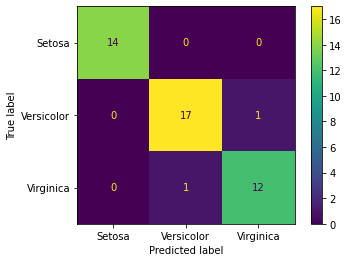

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dtree, X_test, y_test)
plt.show()

#### Normalize the confusion matrix over all.

What is the ratio of each cell over all?

The sum of the digonal is *accuracy*.

In [26]:
metrics.confusion_matrix(y_test.values, y_pred, normalize='all')

array([[0.31111111, 0.        , 0.        ],
       [0.        , 0.37777778, 0.02222222],
       [0.        , 0.02222222, 0.26666667]])

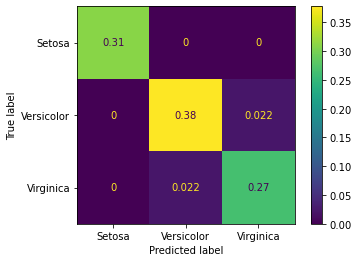

In [27]:
plot_confusion_matrix(dtree, X_test, y_test, normalize='all')
plt.show()

#### Normalize the confusion matrix over the groundtruth (rows).

How much of the groundtruth is classfiied correct for each label?

A ratio in the digonal is *recall* for the corresponding class label.

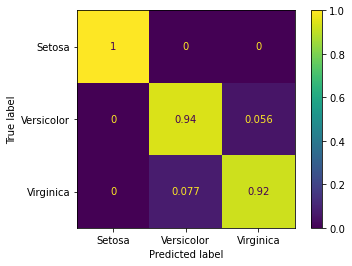

In [28]:
plot_confusion_matrix(dtree, X_test, y_test, normalize='true')
plt.show()

In [58]:
metrics.confusion_matrix(y_test.values, y_pred, normalize='true')

array([[0.73972603, 0.26027397],
       [0.54117647, 0.45882353]])

#### Normalize over the predicted (column).

How many of the predicted labels are correct?

A ratio in the digonal is *precision* for the corresponding class label.

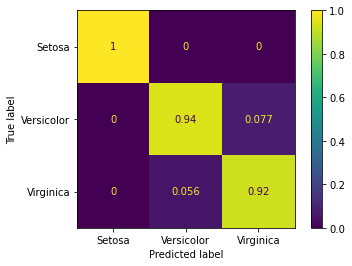

In [29]:
plot_confusion_matrix(dtree, X_test, y_test, normalize='pred')
plt.show()

In [30]:
metrics.confusion_matrix(y_test.values, y_pred, normalize='pred')

array([[1.        , 0.        , 0.        ],
       [0.        , 0.94444444, 0.07692308],
       [0.        , 0.05555556, 0.92307692]])

## 6. Visualizing Decision Trees

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.

* pip install graphviz

* pip install pydotplus

**export_graphviz** function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.

In [31]:
feature_cols

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width'], dtype='object')

In [32]:
dtree.classes_

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

[Text(133.92000000000002, 195.696, 'X[2] <= 2.6\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[3] <= 1.65\ngini = 0.497\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(66.96000000000001, 108.72, 'X[2] <= 5.0\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(100.44000000000001, 65.232, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.84000000000003, 108.72, 'X[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(234.36, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.8

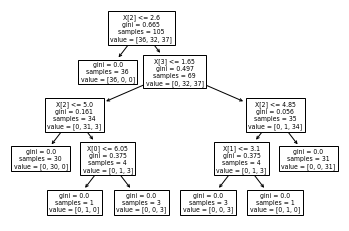

In [35]:
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

# Export each tree into a .dot file
#file_path_name = "{0}-{1}.png".format(c, md)
export_graphviz(dtree, out_file='iris_dt.dot', 
                #class_names=True, 
                class_names= data.variety.unique(), 
                feature_names=feature_cols,
                impurity=False,
                filled=True)
        



tree.plot_tree(dtree)

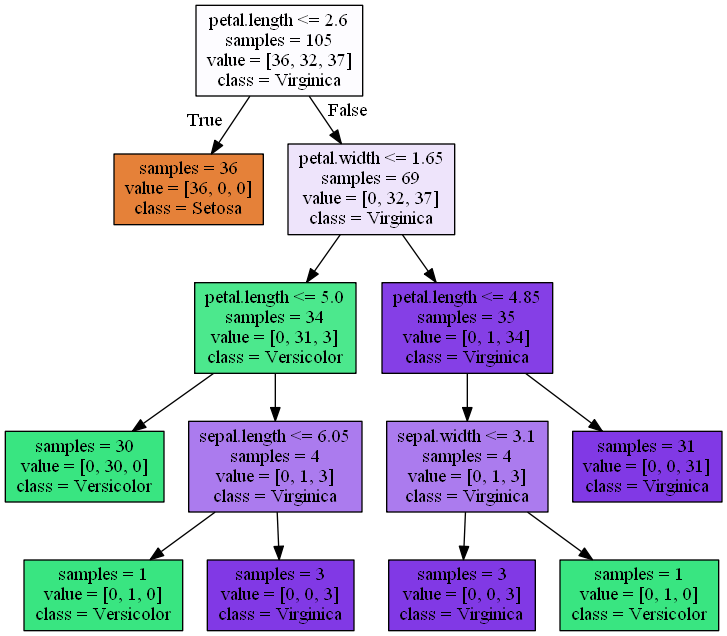

In [36]:
! dot -Tpng iris_dt.dot -o iris_dt.png

from IPython import display
display.Image("iris_dt.png")

In [37]:
import graphviz

with open('iris_dt.dot') as f:
    tree_graph = f.read()

graph = graphviz.Source(tree_graph)
# This render the .dot file into a PDF
graph.render("iris_dt", view=True)

'iris_dt.pdf'

## 7. (Optional exercise) Optimizing Decision Trees

Create multiple decision trees and observe their accuracy.

## 8. (Optional exercise) Random Forest

Create a random forest and use it in classification.